### Загрузка библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Объявление функций:

In [2]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

### Загрузка датасета:

In [7]:
iris_data = pd.read_csv("./Iris.csv")
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Преобразование и разделение данных:

In [8]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

In [9]:
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### Обучение нейросети:

#### Для первого раза используем не слишком хорошие гиперпараметры, чтобы разница была более заметна:

In [23]:
neuron_numb = 2

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.005
errors = []

In [24]:
for i in range(500):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

### Результаты на тренировочных данных:

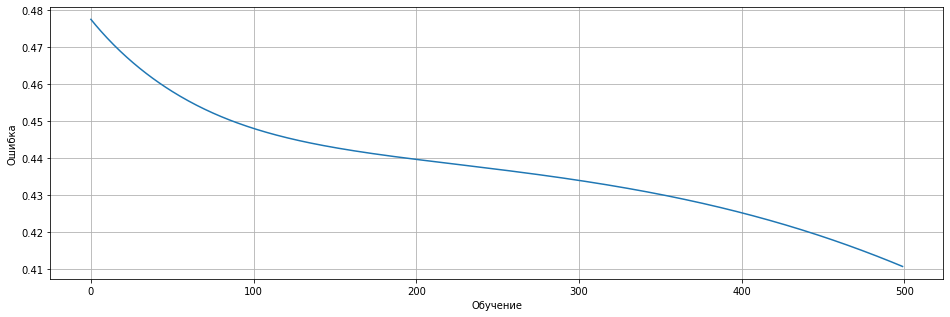

Точность нейронной сети 58.93%


In [25]:
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

### Предсказание и результаты на тестовых данных:

In [26]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
layer2_error_test = y_test - layer2_test

error_test = np.mean(np.abs(layer2_error_test))
accuracy_test = (1 - error_test) * 100
print("Точность нейронной сети на тесте " + str(round(accuracy_test,2)) + "%")

Точность нейронной сети на тесте 58.5%


#### Как видно, при маленьком learning rate двух нейронах и 500 эпохах результат не очень хороший. Попробуем его улучшить. Увеличим learning rate до 0.01:

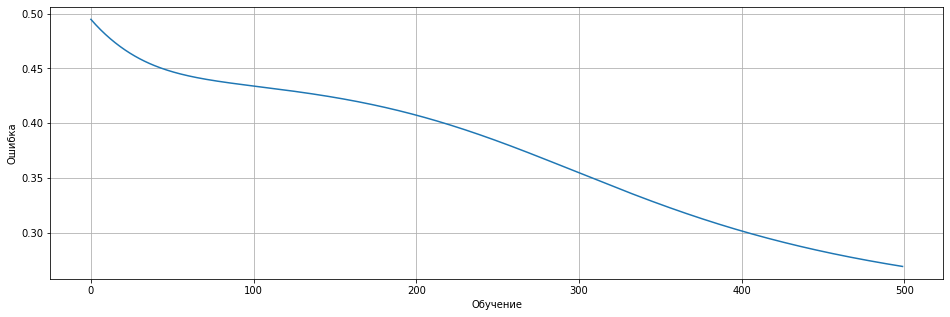

Точность нейронной сети 73.08%


In [28]:
neuron_numb = 2

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.01
errors = []

for i in range(500):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

#### При более высоком learning rate результат значительно возрос.

#### Теперь попробуем при старом маленьком значении learning rate 0.005 увеличить количество эпох до 5000:

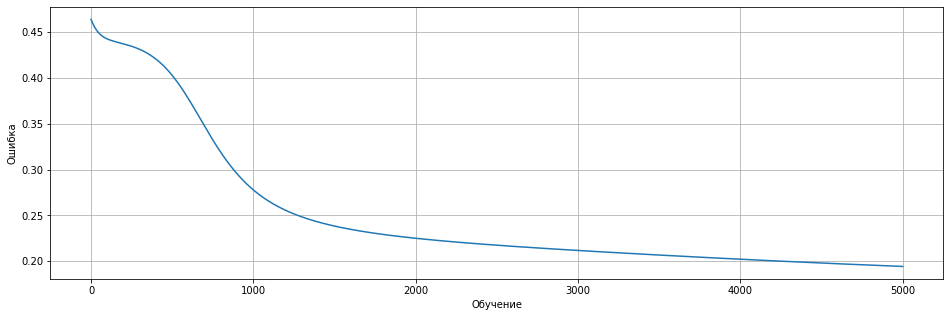

Точность нейронной сети 80.56%


In [31]:
neuron_numb = 2

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.005
errors = []

for i in range(5000):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

#### Видим, что это дало на 7% лучший результат, чем увеличение learning rate.

#### Последним вариантом осталось увеличение количества нейронов. Увеличим их до 6:

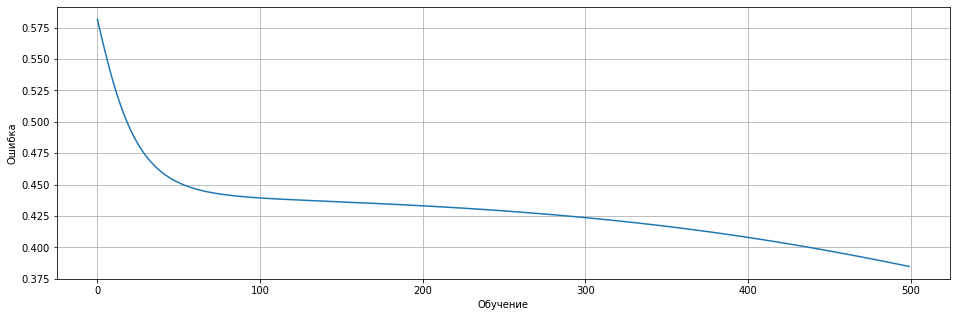

Точность нейронной сети 61.52%


In [32]:
neuron_numb = 6

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.005
errors = []

for i in range(500):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

#### Увеличение количества нейронов с 2 до 6 дало самый худший результат из трех вариантов. Можно сделать вывод, что при маленьком learning rate и небольшом количестве эпох увеличивать количество нейронов бесполезно.

#### Попробуем при тех же параметрах увеличить количество эпох до 1000:

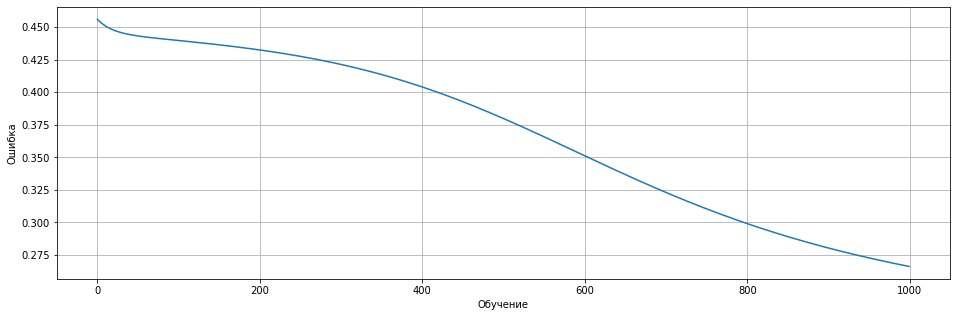

Точность нейронной сети 73.38%


In [36]:
neuron_numb = 6

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.005
errors = []

for i in range(1000):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

#### Увеличение количества эпох до 1000 при 6-ти нейронах дает практически такой же результат, как при увеличении learning rate.

#### Попробуем найти наилучшую комбинацию гиперпараметров:

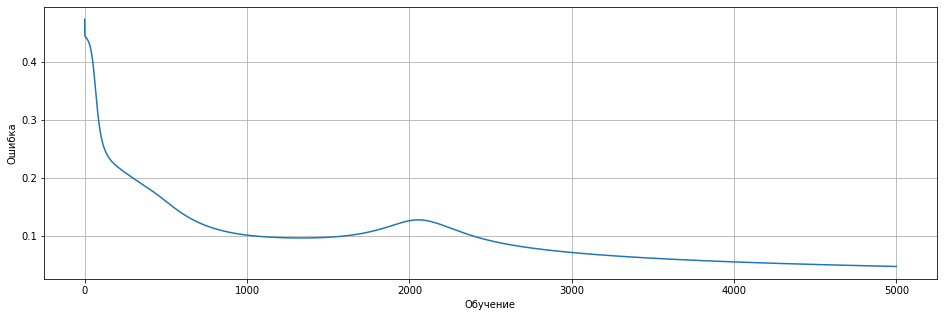

Точность нейронной сети 95.3%


In [58]:
neuron_numb = 8

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.05
errors = []

for i in range(5000):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [61]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
layer2_error_test = y_test - layer2_test

error_test = np.mean(np.abs(layer2_error_test))
accuracy_test = (1 - error_test) * 100
print("Точность нейронной сети на тесте " + str(round(accuracy_test,2)) + "%")

Точность нейронной сети на тесте 94.47%


#### Наилучшие параметры, при которых нейронная сеть дает в среднем 95% точности на тренировочном и тестовом датасетах - 8 нейронов, 5000 эпох и learning rate=0.05, против 2-х нейронов, 500 эпохах и learning rate=0.005 с результатом 58,93% точности.

#### Из чего можно сделать вывод, что для увеличения точности следует увеличивать значения гиперпараметров. Хотя возможно 95% точности свидетельствует о переобучении.

#### Попробуем добавить дополнительный слой:

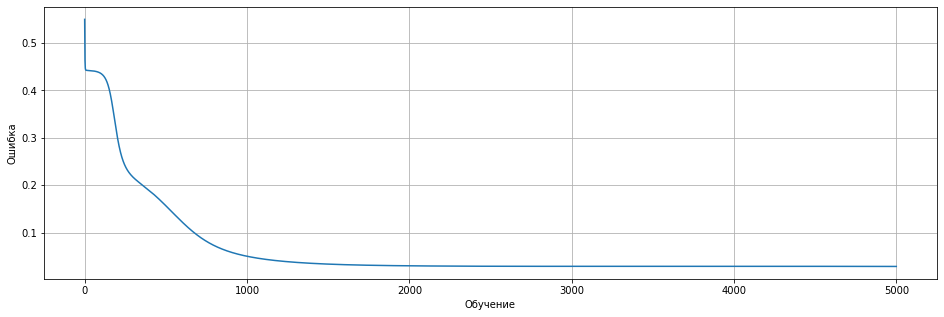

Точность нейронной сети 97.13%


In [65]:
neuron_numb = 8

w0 = 2*np.random.random((4, neuron_numb)) - 1
w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1
w2 = 2*np.random.random((neuron_numb, 3)) - 1

n = 0.05
errors = []

for i in range(5000):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [66]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
layer3_test = sigmoid(np.dot(layer2_test, w2))
layer3_error_test = y_test - layer3_test

error_test = np.mean(np.abs(layer3_error_test))
accuracy_test = (1 - error_test) * 100
print("Точность нейронной сети на тесте " + str(round(accuracy_test,2)) + "%")

Точность нейронной сети на тесте 95.65%


#### Как видно из результатов и графика, при вводе дополнительного слоя и наилучших параметрах, определенных ранее, точность повышается еще сильнее, причем для ее достижения требуется намного меньше эпох. График выходит на плато примерно на 2000-й итерации, что говорит о том, что ввод дополнительного слоя может сократить времязараты.